# Hotel dataset</u> 

### Variables description
- <b>is_canceled :</b> Value indicating if the booking was canceled (1) or not (0).
- <b>lead_time :</b> Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
- <b>arrival_date_year :</b> Year of arrival date.
- <b>arrival_date_month :</b> Month of arrival date with 12 categories: “January” to “December”.
- <b>arrival_date_week_number :</b> Week number of the arrival date.
- <b>arrival_date_day_of_month :</b> Day of the month of the arrival date.
- <b>stays_in_weekend_nights :</b> Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- <b>stays_in_week_nights :</b> Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- <b>adults :</b> Number of adults.
- <b>children :</b> Number of children.
- <b>babies :</b> Number of babies.
- <b>meal :</b> Type of meal booked. Categories are presented in standard hospitality meal packages: 
- - Undefined/SC – no meal package.
- - BB – Bed & Breakfast.
- - HB – Half board (breakfast and one other meal – usually dinner).
- - FB – Full board (breakfast, lunch and dinner).
- <b>country :</b> Country of origin. Categories are represented in the ISO 3155–3:2013 format.
- <b>market_segment :</b> Market segment designation. In categories, “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- <b>distribution_channel :</b> Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- <b>is_repeated_guest :</b> Value indicating if the booking name was from a repeated guest (1) or not (0).
- <b>previous_cancellations :</b> Number of previous bookings that were cancelled by the customer prior to the current booking.
- <b>previous_bookings_not_canceled :</b> Number of previous bookings not cancelled by the customer prior to the current booking.
- <b>reserved_room_type :</b> Code of room type reserved.
- <b>assigned_room_type :</b> Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.

- <b>booking_changes :</b> Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

- <b>deposit_type :</b> Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made.

- <b>agent :</b> ID of the travel agency that made the booking.
- <b>company :</b>	ID of the company/entity that made the booking or responsible for paying the booking. 
- <b>days_in_waiting_list :</b> Number of days the booking was in the waiting list before it was confirmed to the customer.
- <b>customer_type :</b> Type of booking, assuming one of four categories:
- - Contract - when the booking has an allotment or other type of contract associated to it.
- - Group – when the booking is associated to a group.
- - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
- - Transient-party – when the booking is transient, but is associated to at least other transient booking.

- <b>adr :</b>	Average Daily Rate.
- <b>required_car_parking_spaces :</b> Number of car parking spaces required by the customer.	
- <b>total_of_special_requests :</b> Number of special requests made by the customer (e.g. twin bed or high floor).
- <b>reservation_status :</b> Reservation last status, assuming one of three categories:
- - Canceled – booking was canceled by the customer.
- - Check-Out – customer has checked in but already departed.
- - No-Show – customer did not check-in and did inform the hotel of the reason why.

- <b>reservation_status_date :</b> Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [3]:
# loading dataframe
hotel_df = pd.read_csv('hotel_bookings.csv')
# printing first 5 rows of the dataframe
hotel_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [4]:
# creating a copy of our dataset
df = hotel_df.copy()

In [5]:
# dataframe shape
df.shape

(119390, 32)

In [6]:
# Information about columns i.e: number of non-null values and data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# Statistical values of the dataset
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [8]:
# number of unique values in each column
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

## Data Cleaning

In [9]:
# finding number of duplicate rows
df.duplicated().sum()

31994

Hence we have 31994 duplicate values in our rows. So we are going to drop those values

In [10]:
# dropping duplicate rows
df = df.drop_duplicates()

In [11]:
# dataframe shape after dropping duplicate rows
df.shape

(87396, 32)

In [12]:
# missing values in dataframe
df.isna().sum().sort_values(ascending=False).head()

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

We have missing/null values in company, agent, country and children columns. 

- As [company] column have 82137 NULL values which is almost 93% of total count it is better to drop that column  

In [13]:
# dropping company column
# df.drop(['company'], axis=1, inplace=True)

- Since country column contains country code we will fill it with value 'others'.

In [14]:
# Replacing NA values with 'others'
df['country'].fillna('others',inplace=True)

- As the count of missing values in Children Column is only 4, so we can replace with mean value of children.

In [15]:
# replaceing NA with Mean value of children
df['children'].fillna(df['children'].mean(), inplace=True)

- dropping rows in which addition of adults, children and babies is 0. That simply means  no bookings were made.

In [16]:
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

In [17]:
# dropping rows in which addtion of of adults, children and babies is 0.
len(df[df['adults']+df['babies']+df['children']==0])
df.drop(df[df['adults']+df['babies']+df['children']==0].index,inplace=True)

In [23]:
df.var()

C:\Users\AKHILC~1\AppData\Local\Temp/ipykernel_5072/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


is_canceled                           0.199484
lead_time                          7406.096949
arrival_date_year                     0.470684
arrival_date_week_number            186.847457
arrival_date_day_of_month            78.066862
stays_in_weekend_nights               1.055568
stays_in_week_nights                  4.160908
adults                                0.386541
children                              0.208177
babies                                0.012929
is_repeated_guest                     0.037078
previous_cancellations                0.136415
previous_bookings_not_canceled        3.003405
booking_changes                       0.504999
agent                             12815.545780
company                           17026.764223
days_in_waiting_list                100.020018
adr                                3013.046794
required_car_parking_spaces           0.079332
total_of_special_requests             0.692309
dtype: float64

In [19]:
# ax = df.plot.kde()

## EDA 

### Univariate analysis

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64


<AxesSubplot:>

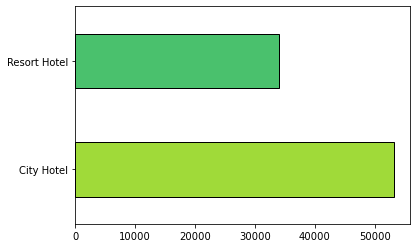

In [20]:
# number of bookings made in City hotel and Resort hotel 1
print(df['hotel'].value_counts())
# df['hotel'].value_counts().plot.barh(color='whitesmoke', edgecolor='black')
df['hotel'].value_counts().plot.barh(color=sns.color_palette('viridis_r'), edgecolor='black')

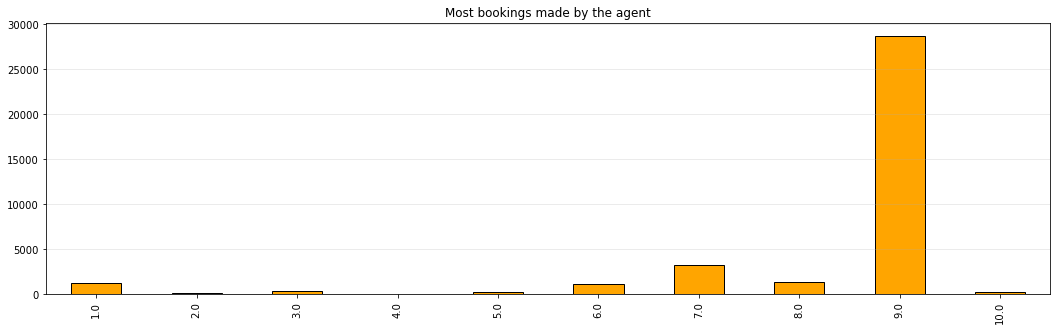

In [21]:
# to see which agent made the most bookings 2
df['agent'].value_counts().sort_index().head(10).plot.bar(figsize=(18,5), width=0.5, edgecolor='black', color='orange')
plt.title('Most bookings made by the agent')
plt.grid(axis='y', alpha=0.3)
plt.show()

Agent with <b>id:9</b> made most number of bookings compared to other agents. 

In [22]:
# to find the number of bookings that were cancelled 3
df['is_canceled'].value_counts()

0    63221
1    24009
Name: is_canceled, dtype: int64

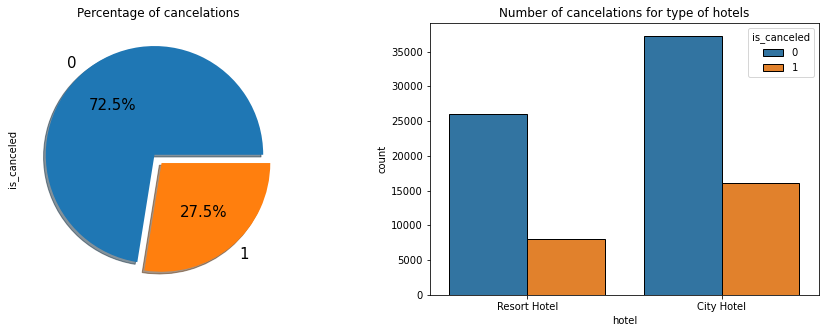

In [23]:
# pie chart to visualize booking cancellations.
plt.subplot(1,2,1)
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(5,5),fontsize=15)
plt.title("Percentage of cancelations")

# Number of booking cancelations for both type of hotel
plt.subplot(1,2,2)
sns.countplot(x=df['hotel'], hue=df['is_canceled'], edgecolor='black')
plt.title("Number of cancelations for type of hotels")
plt.subplots_adjust(right=2.5)

- Total 24025 bookings which constitutes 27.5% of total bookings were cancelled.

{'A': 56436, 'B': 996, 'C': 914, 'D': 17376, 'E': 6036, 'F': 2820, 'G': 2050, 'H': 596, 'L': 6}


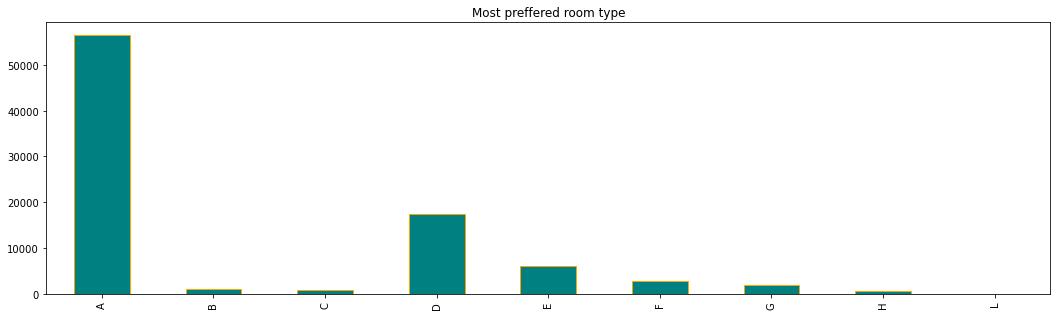

In [24]:
# most preffered room type 4
print(dict(df['reserved_room_type'].value_counts().sort_index()))
df['reserved_room_type'].value_counts().sort_index().plot.bar(figsize=(18,5), color='teal', edgecolor='orange')
plt.title('Most preffered room type')
plt.show()

- 'A' is the most preffered room type followed by 'D' and 'E'

BB           67907
FB             360
HB            9080
SC            9391
Undefined      492
Name: meal, dtype: int64


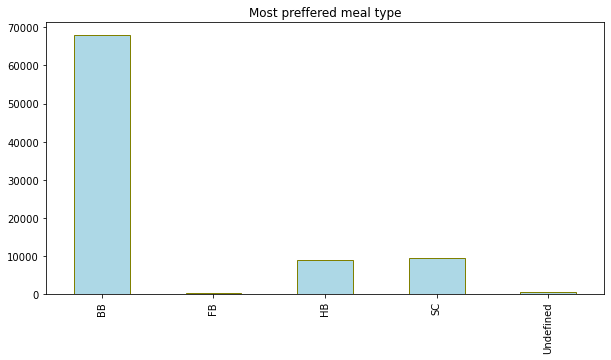

In [25]:
# most preffered meal type 5
print(df['meal'].value_counts().sort_index())
df['meal'].value_counts().sort_index().plot.bar(figsize=(10,5), color='lightblue', edgecolor='olive')
plt.title('Most preffered meal type')
plt.show()

- BB(Bed & Breakfast) is the most popular meal type among the guests followed by SC(No meal) and HB(Half board)

Transient          71862
Transient-Party    11692
Contract            3135
Group                541
Name: customer_type, dtype: int64


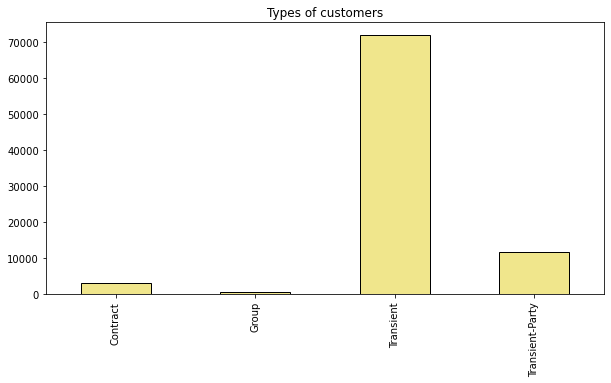

In [26]:
# customer type 6
print(df['customer_type'].value_counts())
df['customer_type'].value_counts().sort_index().plot.bar(figsize=(10,5), color='khaki', edgecolor='black')
plt.title('Types of customers')
plt.show()

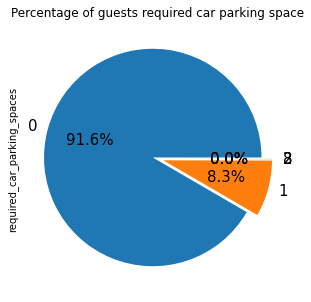

In [27]:
# Percentage of people required parking spaces. 7
df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%', figsize=(5,5), fontsize=15)
plt.title('Percentage of guests required car parking space')
plt.show()

- 91.6% guests did not required any kind of parking space. While 8.3% of guests required required 1 parking space.

Text(0.5, 1.0, 'Percentage of booking changes made by customers')

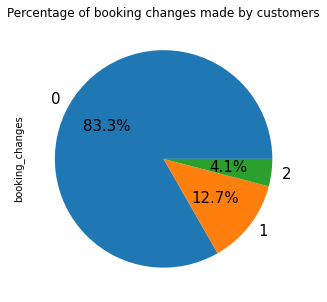

In [28]:
# What is the percentage of booking changes made by the customer? 8
df['booking_changes'].value_counts().head(3).plot.pie(autopct='%1.1f%%', figsize=(5,5), fontsize=15)
plt.title('Percentage of booking changes made by customers')

<AxesSubplot:>

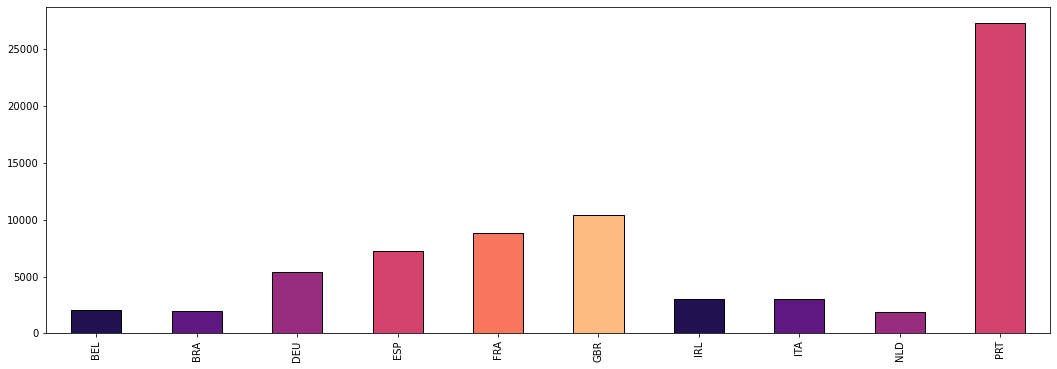

In [29]:
# top 10 countries from which guests are arriving 9
df['country'].value_counts().head(10).sort_index().plot.bar(figsize=(18,6), color=sns.color_palette('magma'), edgecolor='black')

In [30]:
# World map to show customers from several countries
temp = df['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
guest_map = px.choropleth(temp,
                          locations=temp['country'],
                          color=np.log(temp['count']), 
                          hover_name=temp['country'], 
                          color_continuous_scale=px.colors.sequential.Viridis_r,
                          title="Nationality of guests")
guest_map.show()

In [31]:
# World map to show cutomers from several countries
country_visitors = df['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})

px.choropleth(country_visitors,
                    locations = country_visitors["country"],
                    color=np.log(country_visitors['count']),
                    hover_name= country_visitors['country'], 
                    color_continuous_scale = px.colors.sequential.Viridis_r,
                    projection = 'orthographic',
                    title="Nationality of visitors"
             )

Text(0.5, 1.0, 'Booking % by distribution channels')

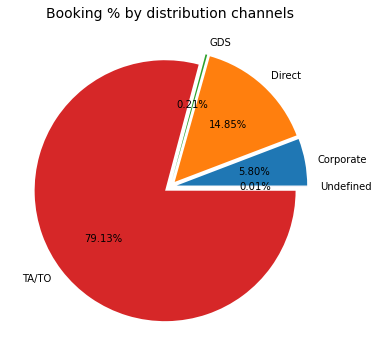

In [32]:
# which distribution channel is most used by customers 10
group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (6,6))

data = d1['Booking_%']

labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5,labels=labels)
plt.title("Booking % by distribution channels", fontsize=14)

Text(0.5, 1.0, 'Year Wise bookings')

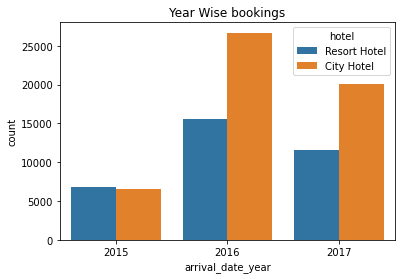

In [33]:
# Year wise bookings 11
sns.countplot(x=df['arrival_date_year'], hue=df['hotel'])
plt.title("Year Wise bookings")

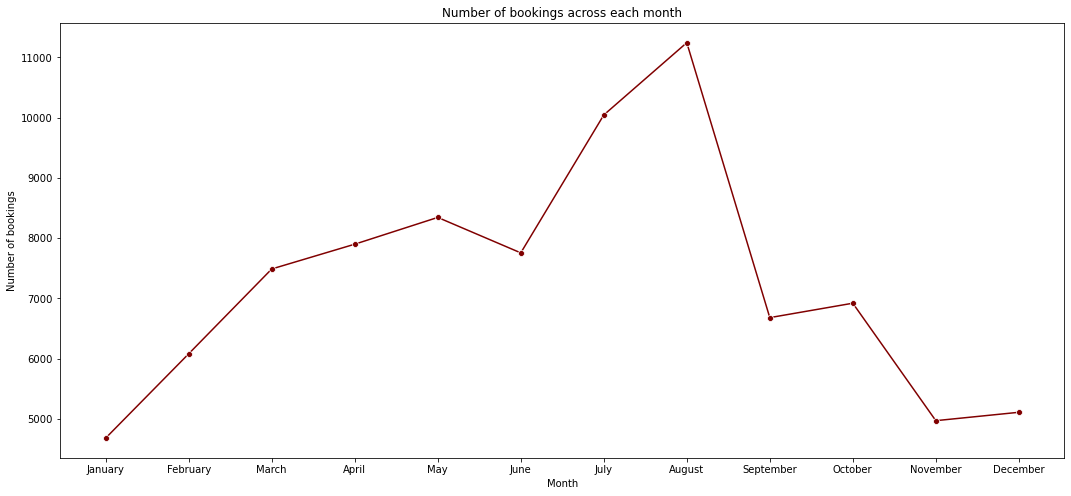

In [34]:
# groupby arrival_date_month and taking the hotel count 12
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

# df to map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'], categories=months, ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

# set plot size
plt.figure(figsize=(18,8))
# plotting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'], y=bookings_by_months_df['Counts'], color='maroon',marker='o')
plt.title('Number of bookings across each month')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.show()

Most number of bookings were in <b>August</b> followed by <b>July</b> then <b>may</b>.

## Bivariate Analisys

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

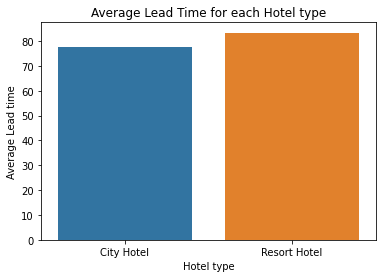

In [35]:
#group by hotel and taking mean of lead time 1
grup_by_hotel=df.groupby('hotel')
avg_lead_time=grup_by_hotel['lead_time'].mean().reset_index()

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

<AxesSubplot:xlabel='arrival_date_month'>

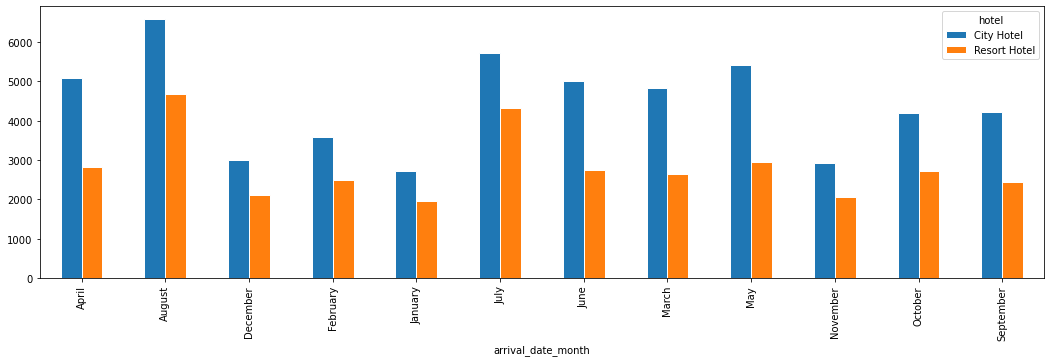

In [36]:
# Arrival month vs guests count 2
df_arrival_month=df.groupby(['arrival_date_month','hotel']).size()
df_arrival_month=df_arrival_month.unstack()
df_arrival_month.plot(kind='bar', figsize=(18,5), edgecolor='white')

Text(0.5, 1.0, 'Average Daily rate by months')

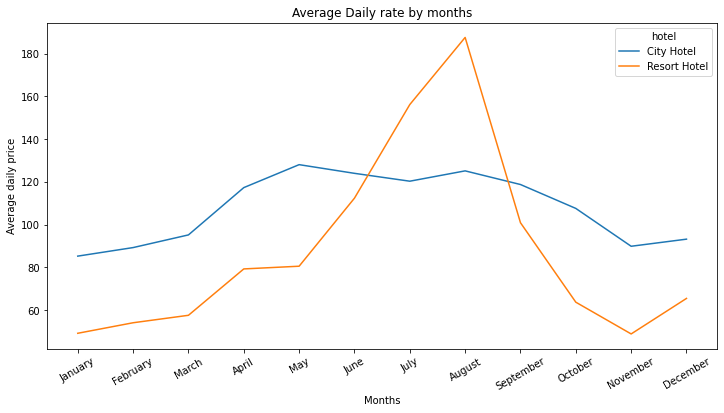

In [37]:
# Average daily rate of hotel room(s) by month 3
d_hotel_month_adr = df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
d_hotel_month_adr['arrival_date_month'] = pd.Categorical(d_hotel_month_adr['arrival_date_month'], categories=months, ordered=True)
d_hotel_month_adr.sort_values('arrival_date_month', inplace=True)

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=d_hotel_month_adr)
plt.ylabel("Average daily price")
plt.xlabel("Months")
p = plt.xticks(rotation=30)
plt.title("Average Daily rate by months")

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

Text(0.5, 1.0, 'ADR across Distribution channel')

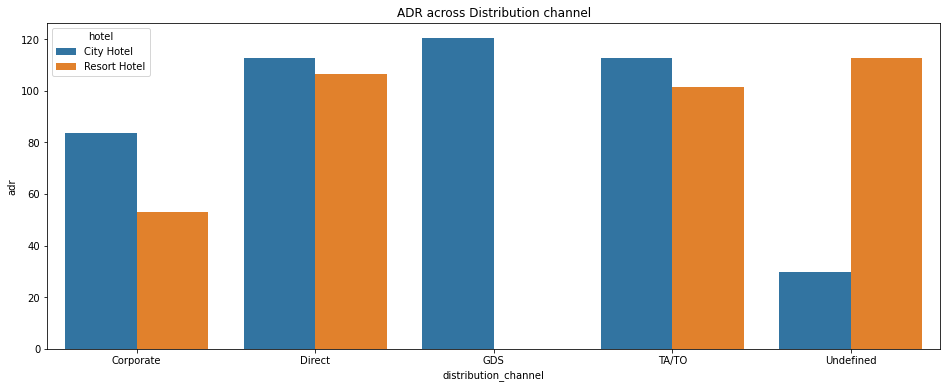

In [38]:
# ADR across multiple distribution channel
# group by distribution channel and hotel 4
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,6))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

- Corporate- These are corporate hotel booking companies which makes bookings possible.

- GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
- Direct- means that bookings are directly made with the respective hotels
- TA/TO- means that bookings are made through travel agents or travel operators.
- Undefined- Bookings are undefined. may be customers made their bookings on arrival.

In [39]:
# how many bookings got cancelled in each market segment 5
market_segment_df = df[df['is_canceled']==1]   # canceled=1
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

market_segment         hotel  counts
0        Aviation    City Hotel      45
1   Complementary    City Hotel      54
2   Complementary  Resort Hotel      31
3       Corporate    City Hotel     263
4       Corporate  Resort Hotel     246
5          Direct    City Hotel     912
6          Direct  Resort Hotel     825
7          Groups    City Hotel     887
8          Groups  Resort Hotel     445
9   Offline TA/TO    City Hotel    1257
10  Offline TA/TO  Resort Hotel     800
11      Online TA    City Hotel   12615
12      Online TA  Resort Hotel    5627
13      Undefined    City Hotel       2

Online T/A' has the highest cancellation in both type of cities<br>
In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

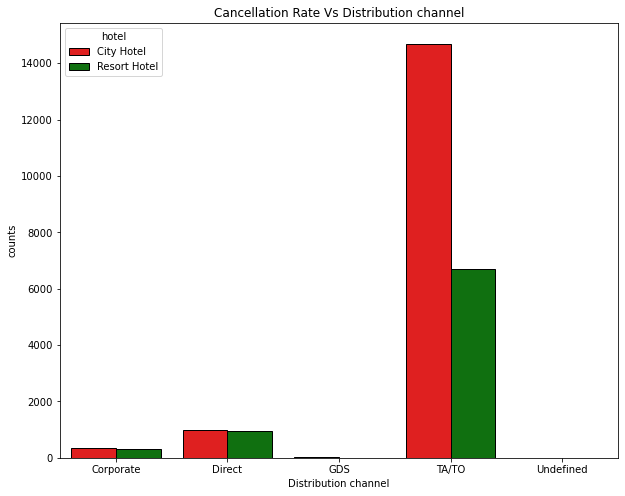

In [40]:
canceled_df = df[df['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

#set plot size and plot barchart 
plt.figure(figsize=(10,8))
sns.barplot(x='distribution_channel', y='Counts', hue="hotel", palette=["red", "green"], edgecolor='black', data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

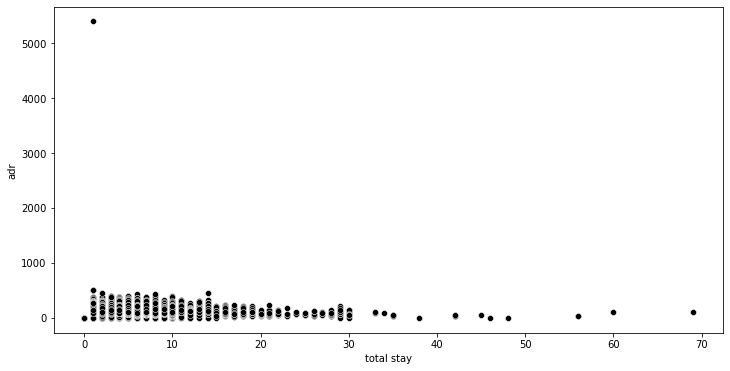

In [41]:
# How adr changes with respect to stay length
plt.figure(figsize = (12,6))
# df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
sns.scatterplot(y = df['adr'], x = df['stays_in_weekend_nights']+df['stays_in_week_nights'], color='black')
plt.ylabel('adr')
plt.xlabel('total stay')
plt.show()

This plot has a outlier. So, we are going to remove it.

In [42]:
# removing outlier
df.drop(df[df['adr'] > 5000].index, inplace = True)

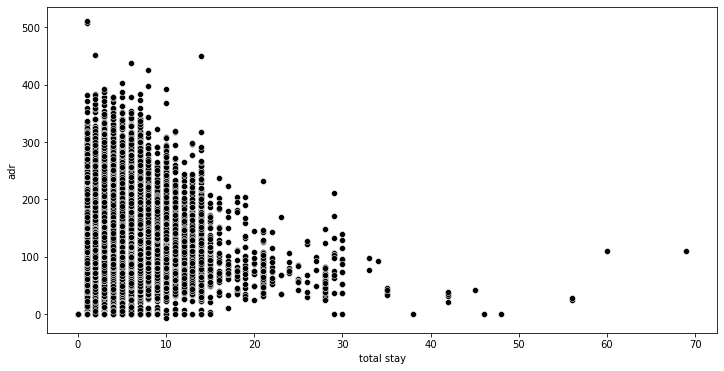

In [43]:
# How adr changes with respect to stay length
plt.figure(figsize = (12,6))
sns.scatterplot(y = df['adr'], x = df['stays_in_weekend_nights']+df['stays_in_week_nights'], color='black')
plt.ylabel('adr')
plt.xlabel('total stay')
plt.show()

From the scatter plot we can see that as length of total stay increases the adr decreases. This means for longer stay, the better deal for guest.

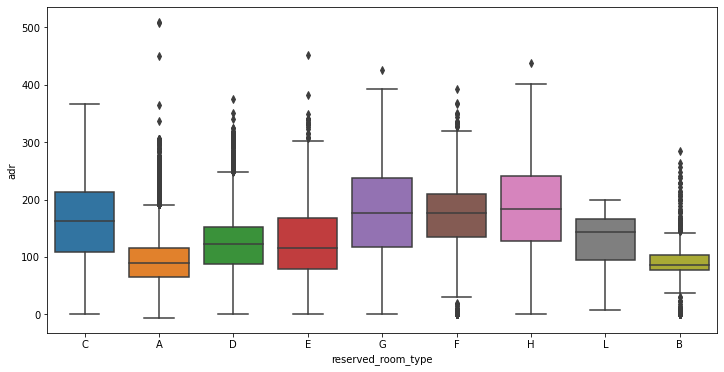

In [44]:
# which room type generate highest adr?
plt.figure(figsize=(12,6))
sns.boxplot(x=df['reserved_room_type'], y=df['adr'])
# ax = sns.stripplot(x=df['reserved_room_type'], y=df['adr'], color="orange", jitter=0.2, size=.5)
plt.show()

Hotels should increase the no. of room types A and H to maximise revenue.

Text(0.5, 1.0, 'Co-relation of the columns')

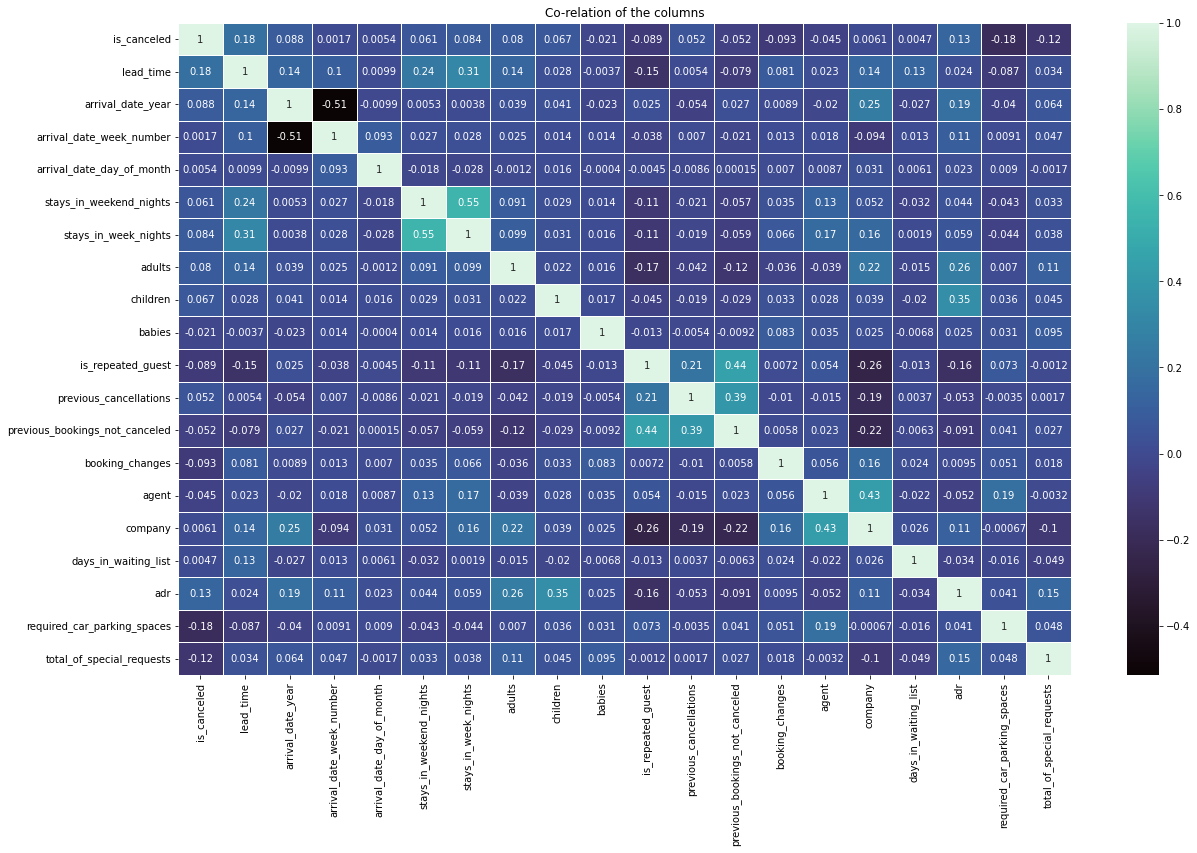

In [45]:
# Correlation heatMap
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='mako')
# YlGnBu
plt.title('Co-relation of the columns')

# Conclusion
- City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.<br>
- 27.5 % bookings were got cancelled out of all the bookings.<br>
- Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus, retention rate is low.<br>
- The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.<br>
- Most of the customers (91.6%) do not require car parking spaces.<br>
- 79.1 % bookings were made through TA/TO (travel agents/Tour operators).<br>
- BB (Bed & Breakfast) is the most preferred type of meal by the guests.<br>
- Maximum number of guests were from Portugal, i.e., more than 25000 guests.<br>
- Most of the bookings for City hotels and Resort hotel were happened in 2016.<br>
- Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.<br>
- Booking cancellation rate is high for City hotels which almost 30 %.<br>
- Average lead time for resort hotel is high.<br>
- Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.<br>
- Resort hotels have the most repeated guests.<br>
- Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.<br>
- Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.<br>